<a href="https://colab.research.google.com/github/koreahong/regression_analysis_study/blob/main/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EA%B0%9C%EB%85%90%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석

## 참고자료
1. [회귀분석개념 참고사이트](https://nurilee.com/2020/01/26/data-science-model-summary-linear-ridge-lasso-elasticnet/)
2. [분석결과표 참고사이트](https://ysyblog.tistory.com/119)
3. [변수선택코드 참고사이트](https://zephyrus1111.tistory.com/65)
4. [참고서적1](http://www.kyobobook.co.kr/product/detailViewKor.laf?ejkGb=KOR&mallGb=KOR&barcode=9791161751191)
5. [참고서적2](http://www.kyobobook.co.kr/product/detailViewKor.laf?ejkGb=KOR&mallGb=KOR&barcode=9791158391928&orderClick=LEa&Kc=)


-----------------------

## 목차
  - 회귀분석 정의 및 간단한 예시
        - kg, puound 예시
  - 종류
        1. 전통적 통계기법
            - 변수선택(VIF, p-value)
        2. 머신러닝 기법
            - alpha값 최적화
            - 릿지, 라쏘, 엘라스틱넷

        - 공통점
            - 실제값과 예측치간의 오차 최소화
        - 차이점
            - 전통적 회귀분석: 설명변수를 최대한 적합시켜 오차를 줄이는 것이 목적
            - 머신러닝 기법: 손실비용함수를 최적화시켜 오차를 줄이는 것이 목적





# 라이브러리 불러오기

In [23]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import *

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet,ElasticNetCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_boston

from patsy import dmatrix

import copy


import warnings
warnings.filterwarnings("ignore")

# 회귀분석 정의

회귀분석이 무엇인지 간단하게 알아보고, 그 종류는 무엇이 있고 어떻게 다른지 알아보겠습니다.  

선형회귀모델로 회귀분석을 알아보겠습니다.  
선형회귀모델이란 'y = ax + b'와 같이 독립변수와 설명 변수간의 선형적관계로 있다는 것을 가정하고 분석하는 모델입니다.  



In [5]:
kilograms = np.array([49, 10, 0, 21, 44, 2, 100], dtype=float).reshape((-1,1))
pounds = np.array([108.027, 22.0462, 0, 46.2971, 97.0034, 4.40925, 220.462], dtype=float).reshape((-1,1))

위와 같이 pound로 kg을 예측 해보겠습니다.

In [8]:
# 선형회귀모델 생성

# sklearn 사용
model1 = LinearRegression()
# statsmodels 사용
model2 = sm.OLS(kilograms, pounds)

# 모델적합시키기
model1.fit(pounds, kilograms)
model2.fit()

# y값 예측
result1_kilograms = model1.predict([[30.0]])
result2_kilograms = model1.predict([[30.0]])

print(f"model1 y값: {result1_kilograms}, model1 y값: {result2_kilograms}")

model1 y값: [[13.6077453]], model1 y값: [[13.6077453]]


실제로 30파운드가 13.6078kg인것을 감안하면 정확하게 예측을 하였습니다.  
이처럼 설명변수(파운드)로 종속변수(kg)을 예측하는 방법을 회귀분석이라고 합니다.  

회귀분석 종류에 대해서 알아보겠습니다.  

회귀분석의 방법으로는 전통적 통계기법과 머신러닝기법이 있습니다. 
전통적 통계기법은 설명변수들을 활용하여 최대한 y에 잘 적합시키는 방법입니다.
그에 반면, 머신러닝 기법은 손실함수비용을 최적화시키는 것입니다.  

위에 말이 어떤 뜻인지 코드로 알아보겠습니다.  

우선 전통적 통계기법을 진행하겠습니다.  


# 실습

데이터는 sklearn의 보스턴 집값을 활용하겠습니다


In [ ]:
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)


formula = "scale(CRIM) + scale(I(CRIM ** 2)) + " + \
    "scale(ZN) + scale(I(ZN ** 2)) + scale(INDUS) + " + \
    "scale(NOX) + scale(RM) + scale(AGE) + " + \
    "scale(np.log(DIS)) + scale(RAD) + scale(TAX) + " + \
    "scale(np.log(PTRATIO)) + scale(B) + scale(np.sqrt(LSTAT)) + CHAS"
dfX = dmatrix(formula, dfX0, return_type="dataframe")
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

이상치, null값, 상관관계, 히트맵등 모델생성전과정은 진행했다고 가정하고 바로 모델생성으로 넘어가겠습니다.  

scale(): 정규화    
** 2: 다항식으로 변환  
C(): 범주형변수

## 1. 전통적 통계기법

In [10]:
model1 = sm.OLS(np.log1p(dfy), dfX)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     146.8
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          2.76e-170
Time:                        05:20:14   Log-Likelihood:                 194.00
No. Observations:                 506   AIC:                            -356.0
Df Residuals:                     490   BIC:                            -288.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

위와 같이 결과표가 나왔습니다.  
주요 해석 사항으로는 p-value, r^2값이 있습니다.  
[결과표참고사이트](https://ysyblog.tistory.com/119)

Adj. R-squared 값이 0.8로 유의미한 모델이라고 평가할 수 있습니다.  
다만, 일분 변수들의 p-value값이 유의수준 0.05를 웃돌아 필요없는 변수를 제거하고 Cond No 값이 10이상인 것을 통해 다중공선성을 제거해야할 필요가 있다는 것을 알 수 있습니다.

다중공선성을 침해하는 변수보다 불필요한 변수를 먼저 제거하고 다중공선성을 해치는 변수를 삭제하겠습니다. 다중공선성은 클경우 변수끼리 상관관계가 높을경우 과적합으로 설명계수 값이 높게 나오는 위험을 야기함으로 반드시 확인해야 합니다.  

변수제거는 후진제거법을 통해 제거하겠습니다. 
변수제거는 전진제거법, 후진제거법, 단계적 제거법이 있습니다.  
전진제거법은 유의미한 변수 순서대로 추가하는 방법입니다.  
후진제거법은 불필요한 변수를 순서대로 제거한는 방법입니다. 
단계적 제거법은 전진제거법과 후진제거법을 결합한 형태로 변수마다 전진제거법과 후진제거법을 적용하는 방법입니다.  

[변수선택코드참고](https://zephyrus1111.tistory.com/65)

In [11]:
df = dfX

## 후진 소거법
variables = df.columns.tolist() ## 설명 변수 리스트
 
y = dfy ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

-----------------------------
그래프 그리기

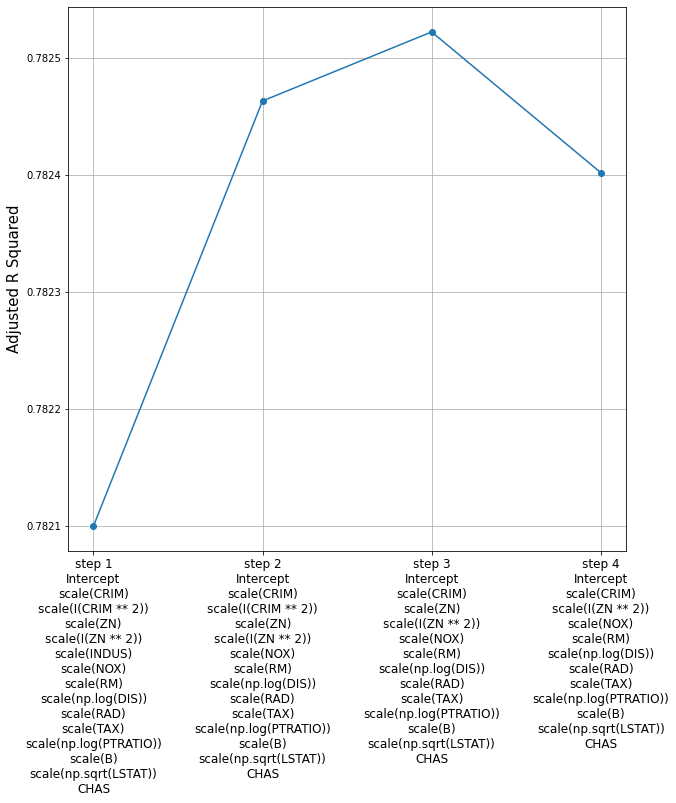

In [12]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

추가로 ZN**2의 p-value값을 참고하여 변수를 제거하겠습니다.

In [13]:
sv_per_step[-1] = set(sv_per_step[-1]) - set(['scale(I(ZN ** 2))'])
model1 = sm.OLS(np.log1p(dfy), dfX[sv_per_step[-1]])
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     212.6
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          4.87e-172
Time:                        05:33:59   Log-Likelihood:                 184.63
No. Observations:                 506   AIC:                            -347.3
Df Residuals:                     495   BIC:                            -300.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
scale(B)                   0

----------
다중공선성 확인하여 제일 큰것부터 하나씩 제거하여 5이상인 변수를 제거하겠습니다.

In [14]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX[sv_per_step[-1]].values, i) for i in range(dfX[sv_per_step[-1]].shape[1])]
vif["features"] = dfX[sv_per_step[-1]].columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.058904,CHAS
1,1.078687,Intercept
2,1.346557,scale(B)
3,1.542090,scale(np.log(PTRATIO))
4,1.809947,scale(CRIM)
5,1.895805,scale(RM)
6,2.798698,scale(np.sqrt(LSTAT))
7,3.566790,scale(np.log(DIS))
8,4.341448,scale(NOX)
9,6.918274,scale(RAD)


In [15]:
VIF1 = vif.iloc[:-1, 1].values

In [16]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX[VIF1].values, i) for i in range(dfX[VIF1].shape[1])]
vif["features"] = dfX[VIF1].columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.049792,CHAS
1,1.078010,Intercept
2,1.343364,scale(B)
3,1.534189,scale(np.log(PTRATIO))
4,1.808154,scale(CRIM)
5,1.874766,scale(RM)
6,2.737322,scale(RAD)
7,2.796851,scale(np.sqrt(LSTAT))
8,3.532133,scale(np.log(DIS))
9,4.257284,scale(NOX)


In [17]:
model1 = sm.OLS(np.log1p(dfy), dfX[VIF1])
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     223.3
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          3.53e-168
Time:                        05:34:11   Log-Likelihood:                 172.70
No. Observations:                 506   AIC:                            -325.4
Df Residuals:                     496   BIC:                            -283.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
CHAS                       0

다중공선성 및 p-value값을 만족하는 변수만을 추출하여 최종모델을 생성하였습니다.  
이 과정에서 유의수준을 몇으로 할건지 등 분석자의 관점이 다소 개입하는 것을 알 수 있습니다.  

## 머신러닝 기법

머신러닝 기법에는 Ridge, Lasso, Elasticnet이 있습니다.  
위 기법의 의의는 데이터 변동성에 대한 민감도를 줄이기 위함입니다.  

저희가 앞서 진행한 회귀모델은 실제값과 예측값의 차이를 줄이는 것에만 치중하다보니 데이터 변동성에 민감해졌습니다. 이러한 문제점을 개선하기 위해서 잔차의 최소화하고 회귀계수값의 과적합을 방지하는 방법을 사용해야합니다. 위 머신러닝 기법은 아래와 같이 이를 적용합니다.  

목표: MIN(RSS(W) + alpha * ||W||), 손실비용함수(오차제곱합-MSE) 최소  
[수식참고 사이트](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)

Ridge는 L2-정규화로 회귀계수의 제곱값에 페널티를 부여하여 과적합을 방지합니다.  
Ridge의 페널티 값이 0이면 기존 손실비용함수와 같아집니다. 반대로, 페널티 값이 커지면 서로 영향을 미치는 독립변수들의 가중치가 줄어들어 다중공선성이 낮아집니다.  

Lasso는 L1-정규화로 회귀계수의 절댓값에 페널티를 부여하여 과적합을 방지합니다. 

둘의 차이는 Ridge는 회귀계수를 무한히 작게할 수 있지만 0이 되지 않는 반면에, Lasso는 회귀계수를 0으로 만들 수 있다는 것입니다. 이는 곧 변수선택의 기능이 있다는 것입니다. 

이 둘의 장점을 섞은 것이 Elasticnet입니다.

위 기법들을 진행해보겠습니다.

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(dfX, dfy, test_size=0.2,random_state=3)

alphas = [0, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 10]

In [36]:
for a in alphas:
  model = Ridge(alpha=a).fit(xtrain,ytrain)
  score = model.score(xtrain, ytrain)
  pred_y = model.predict(xtest)
  mse = mean_squared_error(ytest, pred_y)
  print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
  .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0000, R2:0.77, MSE:13.32, RMSE:3.65
Alpha:0.0001, R2:0.77, MSE:13.32, RMSE:3.65
Alpha:0.0010, R2:0.77, MSE:13.32, RMSE:3.65
Alpha:0.0100, R2:0.77, MSE:13.32, RMSE:3.65
Alpha:0.1000, R2:0.77, MSE:13.32, RMSE:3.65
Alpha:0.3000, R2:0.77, MSE:13.31, RMSE:3.65
Alpha:0.5000, R2:0.77, MSE:13.30, RMSE:3.65
Alpha:0.7000, R2:0.77, MSE:13.29, RMSE:3.65
Alpha:1.0000, R2:0.77, MSE:13.27, RMSE:3.64
Alpha:10.0000, R2:0.77, MSE:13.36, RMSE:3.65


In [25]:
ridge_cv=RidgeCV(alphas=alphas, cv=5)
model = ridge_cv.fit(xtrain, ytrain)
print(model.alpha_)

1.0


In [26]:
lasso_cv=LassoCV(alphas=alphas, cv=5)
model = lasso_cv.fit(xtrain, ytrain)
print(model.alpha_)

0.01


In [32]:
elasticnet_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elasticnet_cv.fit(xtrain, ytrain)
print(model.alpha_)

0.01


In [80]:
ridge=Ridge(alpha=1).fit(xtrain, ytrain)
ypred_ridge = ridge.predict(xtest)
score_ridge = ridge.score(xtest, ytest)
mse_ridge = mean_squared_error(ytest, ypred_ridge)
print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
.format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

Final Result: Ridge R2:0.840, MSE:13.27, RMSE:3.64


In [44]:
ela=ElasticNet(alpha=0.0).fit(xtrain, ytrain)
ypred_ela = ela.predict(xtest)
score_ela = ela.score(xtest, ytest)
mse_ela = mean_squared_error(ytest, ypred_ela)
print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
.format(score_ela, mse_ela, np.sqrt(mse_ela)))

Final Result: Ridge R2:0.841, MSE:13.17, RMSE:3.63


위 결과를 보면 통계적기법으로 했을때보다 더 좋은 성능이 나왔다는 것을 볼 수 있다. 하지만, 과정중에 변수를 제거하거나 별도로 다중공선성을 체크하거나 하지 않고 알파값 최적만으로도 위 결과를 얻을 수 있습니다. 


# 결론

전통적 통계기법 최종결과: 0.807
머신러닝 기법 최종결롸: 0.84

이제까지 전통적 통계기법과 머신러닝 기법을 비교해 보았습니다.  
어떤 기법이 우수하다고 콕찝어서 말할 수는 없습니다.  

상황에 맞게 적절히 병행해서 사용하면 우수한 분석을 진행할 수 있으리라 생각합니다.